<a href="https://colab.research.google.com/github/shreyajagtap/Data-Science-Project/blob/main/Tesla%20Stock%20Analysis/Tesla_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('ggplot')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('TSLA.csv')

In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,639.000000,639.000000,639.000000,639.000000,6.390000e+02,639.000000
mean,543.362885,517.883537,531.004088,531.298030,4.819130e+07,531.298030
std,340.837426,325.395864,333.534448,333.362040,3.579030e+07,333.362040
min,46.896000,44.855999,45.959999,46.285999,9.800600e+06,46.285999
25%,170.258003,162.379997,167.349998,164.783005,2.392195e+07,164.783005
50%,620.409973,595.500000,603.880005,605.130005,3.448900e+07,605.130005
75%,796.584991,767.744995,779.445007,781.304993,6.329725e+07,781.304993
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


In [ ]:
df.isnull().any()

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df = df.set_index('Date')

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998930,0.999275,0.999116,-0.534646,0.999116
Low,0.998930,1.000000,0.998996,0.999112,-0.552558,0.999112
Open,0.999275,0.998996,1.000000,0.998002,-0.543403,0.998002
Close,0.999116,0.999112,0.998002,1.000000,-0.541623,1.000000
Volume,-0.534646,-0.552558,-0.543403,-0.541623,1.000000,-0.541623
Adj Close,0.999116,0.999112,0.998002,1.000000,-0.541623,1.000000


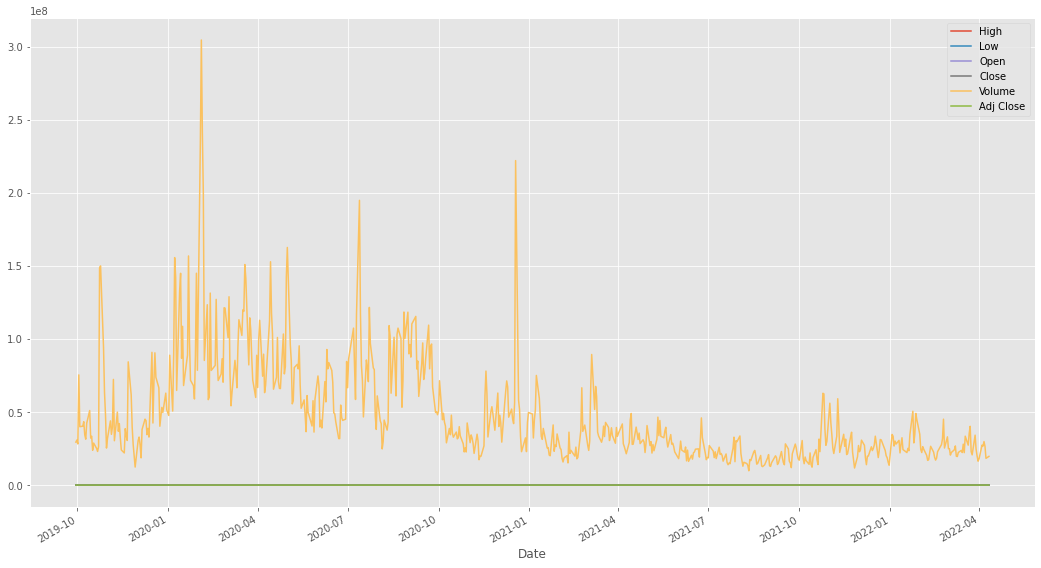

In [ ]:
df.plot(figsize = (18,10))

Text(0.5, 1.0, 'Open and Close Prices for Tesla')

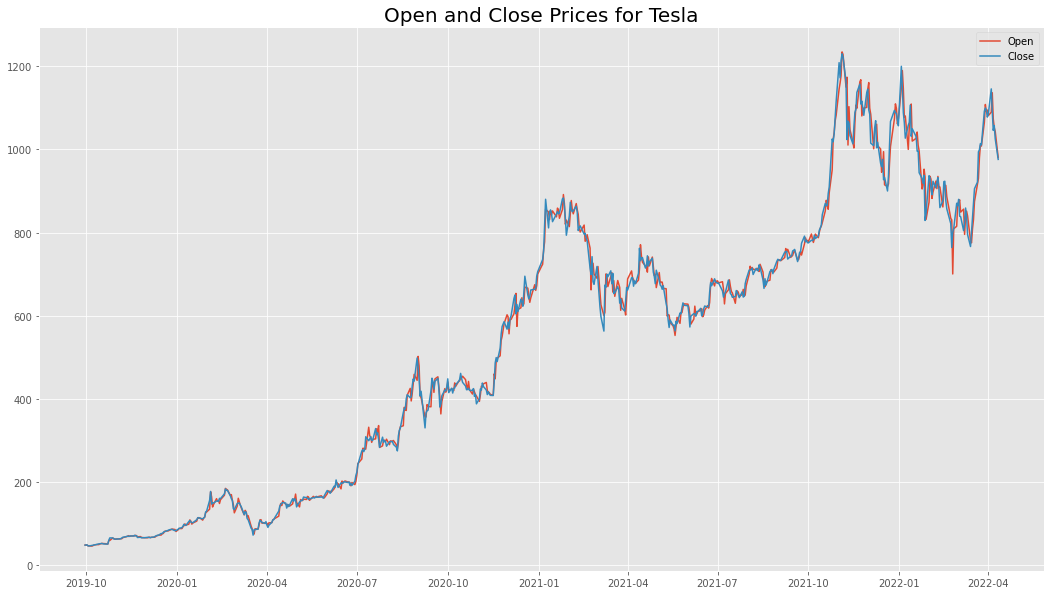

In [ ]:
plt.figure(figsize = (18,10))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.legend(['Open','Close'])
plt.title('Open and Close Prices for Tesla', fontsize =20)

Text(0.5, 1.0, 'High and Low Stock Prices for Tesla')

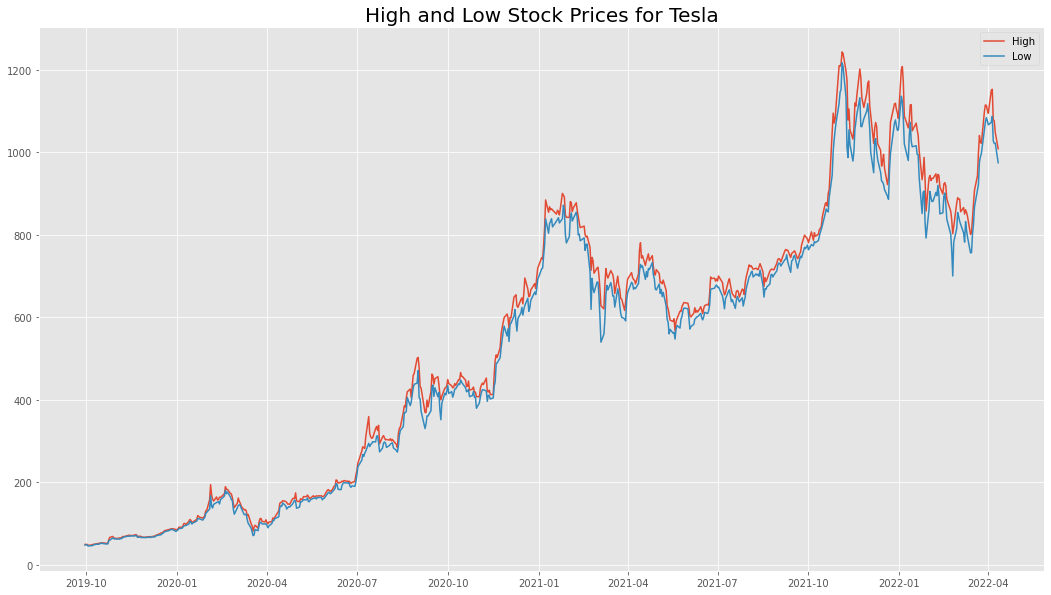

In [ ]:
plt.figure(figsize = (18,10))
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['High','Low'])
plt.title('High and Low Stock Prices for Tesla', fontsize = 20)

In [ ]:
def get_RSI(df, column = 'Adj Close', time_window =14):
    diff = df[column].diff(1)
    
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    up_chg[diff > 0] = diff[diff > 0]
    down_chg[diff < 0] = diff[diff < 0]
    
    up_chg_avg = up_chg.ewm(com = time_window -1, min_periods = time_window).mean()
    down_chg_avg = down_chg.ewm(com = time_window -1, min_periods = time_window).mean()
    
    RS = abs(up_chg_avg/ down_chg_avg)
    df['RSI'] = 100 - 100 / (1 + RS)
    
    return df

In [ ]:
df = get_RSI(df)

In [ ]:
df.dropna()

,High,Low,Open,Close,Volume,Adj Close,RSI
Date,,,,,,,
2019-10-18,52.560001,51.020000,52.139999,51.389999,28749000.0,51.389999,66.986041
2019-10-21,51.900002,50.035999,51.666000,50.700001,25101500.0,50.700001,60.206811
2019-10-22,51.666000,50.169998,50.863998,51.116001,23004000.0,51.116001,62.660369
2019-10-23,51.228001,50.270000,50.900002,50.936001,26305500.0,50.936001,60.910350
2019-10-24,60.986000,57.840000,59.674000,59.936001,148604500.0,59.936001,84.388166
...,...,...,...,...,...,...,...
2022-04-05,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010,64.220676
2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010,57.527682
2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010,58.699269


In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,RSI
Date,,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,NaN
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,NaN
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,NaN
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,NaN
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,NaN


Text(0.5, 1.0, 'Relative Strength Index')

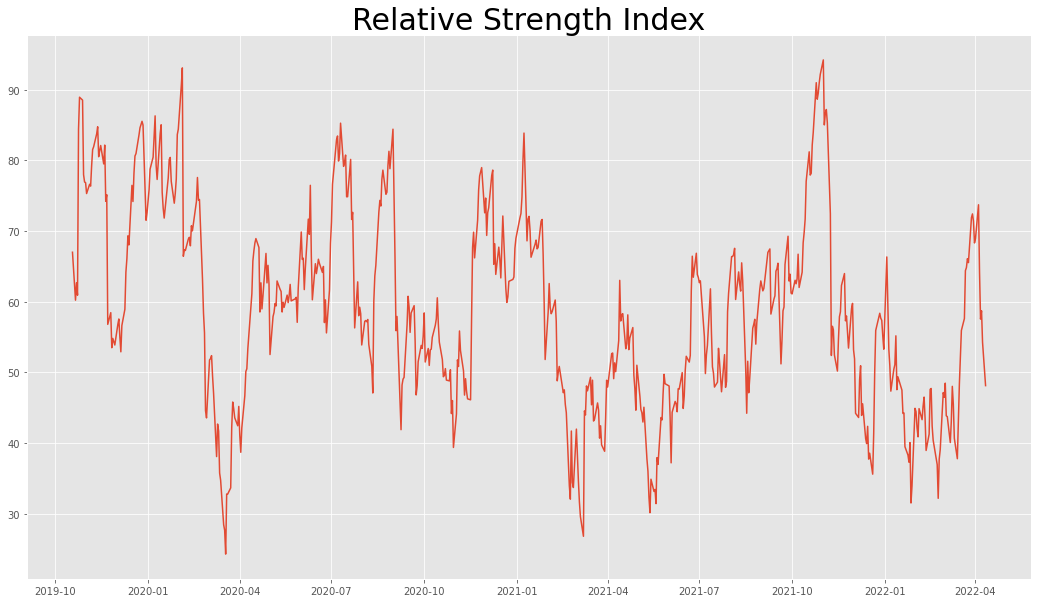

In [ ]:
plt.figure(figsize = (18,10))
plt.plot(df['RSI'])
plt.title('Relative Strength Index', fontsize = 30)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.linear_model import LinearRegression, ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [ ]:
 df = df.dropna()

In [ ]:
X = df.drop(columns = 'Volume')
y = df['Volume']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

print('X Train : ', X_train.shape)
print('X Test : ', X_test.shape)
print('Y Train : ', y_train.shape)
print('Y Test : ', y_test.shape)

X Train :  (468, 6)
X Test :  (157, 6)
Y Train :  (468,)
Y Test :  (157,)


In [ ]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor(criterion = 'absolute_error')
KNR = KNeighborsRegressor(n_neighbors=5,algorithm='auto',leaf_size=50, p=15)
MLP = MLPRegressor()
XGB = XGBRegressor(n_estimators=85,max_depth=5,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.25)

In [ ]:
li = [LR,DTR,RFR,KNR,MLP,KNR,XGB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 49.14582787296279
DecisionTreeRegressor() : 48.534858580789766
RandomForestRegressor(criterion='absolute_error') : 64.71230535226869
KNeighborsRegressor(leaf_size=50, p=15) : 53.23395779197935


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor() : -164.03438626039875
KNeighborsRegressor(leaf_size=50, p=15) : 53.23395779197935
[11:53:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(learning_rate=0.25, max_depth=5, n_estimators=85) : 66.36750120484135


In [ ]:
estimators = np.arange(10,200,10)
scores = []
random_forest_model = RandomForestRegressor()
for n in estimators:
    random_forest_model.set_params(n_estimators = n)
    random_forest_model.fit(X_train,y_train)
    scores.append(random_forest_model.score(X_test, y_test))



print("Score the X-Train with Y-Train is : ", random_forest_model.score(X_train, y_train))
print("Score the X-Test with Y-Test is : ", random_forest_model.score(X_test, y_test))

y_pred_forest = random_forest_model.predict(X_test)

print(' The R2Score Random Forest Model ', r2_score(y_test, y_pred_forest))

Score the X-Train with Y-Train is :  0.9444297821213783
Score the X-Test with Y-Test is :  0.6617145235176403
 The R2Score Random Forest Model  0.6617145235176403


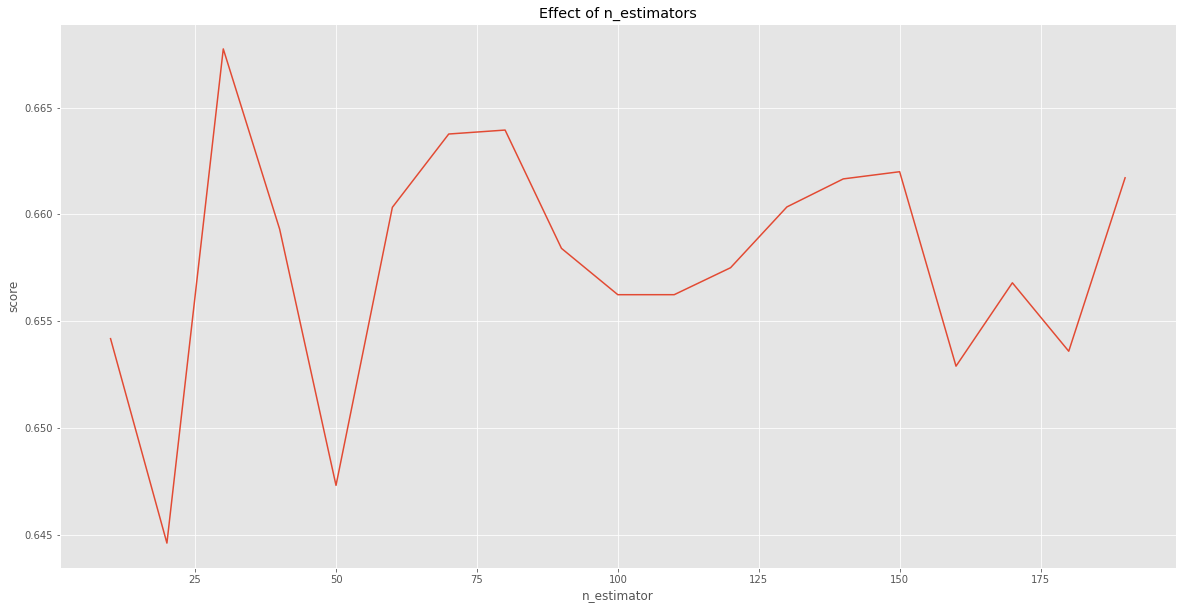

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Effect of n_estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores)